@author: Laurence Lo

# South Carolina MAUP

In [1]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os

maup.progress.enabled = True

In [2]:
import warnings
warnings.filterwarnings('ignore')

[Population data](https://redistrictingdatahub.org/dataset/south-carolina-block-pl-94171-2020-by-table/): from 2020 Census Redistricting Data (P.L. 94-171) Shapefiles *

[2020 County Data](https://redistrictingdatahub.org/dataset/south-carolina-county-pl-94171-2020/): from 2020 Census Redistricting Data (P.L. 94-171) Shapefiles *

[2021 State Senate District Data](https://redistrictingdatahub.org/dataset/2021-south-carolina-state-senate-approved-plan/): 2021 State Senate Approved Plan *

[2020 Election Data](https://redistrictingdatahub.org/dataset/vest-2020-south-carolina-precinct-and-election-results/): VEST 2020 SC precinct and election results *

[2018 Election Data](https://redistrictingdatahub.org/dataset/vest-2018-south-carolina-precinct-and-election-results/): VEST 2018 SC precinct and election results *

# Citations

Followed SC_MAUP.ipynb in-class notebook

Gerry chain at the end from my own Lab 3 notebook

In [18]:
# population

start_time = time.time()
population_df = gpd.read_file("./sc_pl2020_b/sc_pl2020_p2_b.shp")
end_time = time.time()
print("The time to import sc_pl2020_p2_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import mn_pl2020_p2_b.shp is: 0.5053035815556844 mins


In [22]:
# VAP

start_time = time.time()
vap_df= gpd.read_file("./sc_pl2020_b/sc_pl2020_p3_b.shp")
end_time = time.time()
print("The time to import sc_pl2020_p4_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import sc_pl2020_p4_b.shp is: 0.4877498825391134 mins


In [20]:
# Vest 2020

start_time = time.time()
vest20_df = gpd.read_file("./sc_vest_20/sc_vest_20.shp")
end_time = time.time()
print("The time to import sc_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import sc_vest_20.shp is: 0.04840019941329956 mins


In [19]:
# County

start_time = time.time()
county_df = gpd.read_file("./sc_pl2020_cnty/sc_pl2020_cnty.shp")
end_time = time.time()
print("The time to import sc_pl2020_cnty.shp is:",
      (end_time-start_time)/60, "mins")

The time to import sc_pl2020_cnty.shp is: 0.015467313925425212 mins


In [23]:
# Sen

start_time = time.time()
sen_df = gpd.read_file("./sc_sldu_2021/sc_sldu_2021.dbf")
end_time = time.time()
print("The time to import state senate districts is:",
      (end_time-start_time)/60, "mins")

The time to import state senate districts is: 0.016178480784098306 mins


In [24]:
sen_df.shape

(46, 46)

In [25]:
print(population_df.columns)
print(vap_df.columns)
print(vest20_df.columns)
print(county_df.columns)
print(sen_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [26]:
district_col_name = "DISTRICT"

In [27]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(vap_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
sen_df = sen_df.to_crs(sen_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())

In [28]:
maup.doctor(population_df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 146844/146844 [01:17<00:00, 1887.36it/s]


True

In [29]:
maup.doctor(vap_df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 146844/146844 [01:18<00:00, 1878.02it/s]


True

In [30]:
maup.doctor(county_df)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 98.97it/s]


True

In [31]:
maup.doctor(sen_df)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 96.67it/s]


True

In [32]:
maup.doctor(vest20_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2263/2263 [00:03<00:00, 751.37it/s]


There are 822 overlaps.
There are 3729 holes.
There are some invalid geometries.


False

In [33]:
final_df = smart_repair(vest20_df, nest_within_regions = county_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 128.39it/s]


Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:01<00:00, 42.29it/s]


Identifying overlaps...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 60788/60788 [00:54<00:00, 1110.41it/s]


Resolving overlaps and filling gaps...


Gaps to fill in region 44: 100%|████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.71it/s]


1 gaps in region 45 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 45: 100%|████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.07it/s]


In [42]:
import copy
boundaries = copy.deepcopy(final_df)
boundaries["geometry"] = boundaries.geometry.boundary  # get boundaries
neighbors = gpd.sjoin(boundaries, final_df, predicate="intersects") # find boundaries that intersect
neighbors = neighbors[neighbors.index != neighbors.index_right] # remove boundaries of a region with itself

# compute shared border length using intersection
borders = list(neighbors.apply(
    lambda row: row.geometry.intersection(boundaries.loc[row.index_right, "geometry"]).length, axis=1
))

borders.sort()
print(borders[:10000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [43]:
final_df = smart_repair(final_df, min_rook_length = 30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2273/2273 [00:00<00:00, 3238.88it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


Converting small rook adjacencies to queen...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1466.80it/s]


In [36]:
maup.doctor(final_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2263/2263 [00:02<00:00, 817.35it/s]


True

Data is clean let's go

In [37]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, final_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, final_df.geometry)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2263/2263 [00:13<00:00, 167.12it/s]


In [38]:
blocks_to_precincts_assignment

0         1137
1         1133
2         1232
3         1130
4         1137
          ... 
146839     200
146840    1264
146841     195
146842    2039
146843    2032
Length: 146844, dtype: int64

In [45]:
print(vap_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0030001',
       'P0030002', 'P0030003', 'P0030004', 'P0030005', 'P0030006', 'P0030007',
       'P0030008', 'P0030009', 'P0030010', 'P0030011', 'P0030012', 'P0030013',
       'P0030014', 'P0030015', 'P0030016', 'P0030017', 'P0030018', 'P0030019',
       'P0030020', 'P0030021', 'P0030022', 'P0030023', 'P0030024', 'P0030025',
       'P0030026', 'P0030027', 'P0030028', 'P0030029', 'P0030030', 'P0030031',
       'P0030032', 'P0030033', 'P0030034', 'P0030035', 'P0030036', 'P0030037',
       'P0030038', 'P0030039', 'P0030040', 'P0030041', 'P0030042', 'P0030043',
       'P0030044', 'P0030045', 'P0030046', 'P0030047', 'P0030048', 'P0030049',
       'P0030050', 'P0030051', 'P0030052', 'P0030053', 'P0030054', 'P0030055',
       'P0030056', 'P0030057', 'P0030058', 'P0030059', 'P0030060', 'P0030061',
       'P0030062', 'P0030063', 'P0030064', 'P0030065', 'P0030066', 'P0030067',
       'P0030068', 'P0030069', 'P0030070', 'P0030071', 'geom

In [47]:
print(population_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [39]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [48]:
vap_column_names = ['P0030001', 'P0030002', 'P0030005', 'P0030006', 'P0030007',
                    'P0030008', 'P0030009', 'P0030010', 'P0030011']

In [49]:
for name in pop_column_names:
    final_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    final_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [51]:
print(population_df['P0020001'].sum())
print(final_df['P0020001'].sum())
print(vap_df['P0030001'].sum())
print(final_df['P0030001'].sum())

5118425
5118425
4014460
4014460


In [56]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0030001': 'VAP', 'P0030002': 'HVAP', 'P0030005': 'WVAP', 'P0030006': 'BVAP', 'P0030007': 'AMINVAP',
                                        'P0030008': 'ASIANVAP', 'P0030009': 'NHPIVAP', 'P0030010': 'OTHERVAP', 'P0030011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDHAR': 'G20USSD', 
                                        'G20USSRGRA': 'G20USSR'}

In [57]:
final_df.columns

Index(['COUNTY', 'PCODE', 'CODE_NAME', 'G20PRER', 'G20PRED', 'G20PRELJOR',
       'G20PREGHAW', 'G20PREAFUE', 'G20USSR', 'G20USSD', 'G20USSCBLE',
       'G20USSOWRI', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK',
       'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'P0030001',
       'P0030002', 'P0030005', 'P0030006', 'P0030007', 'P0030008', 'P0030009',
       'P0030010', 'P0030011'],
      dtype='object')

In [58]:
final_df.rename(columns=rename_dict, inplace = True)

In [59]:
final_df.columns

Index(['COUNTY', 'PCODE', 'CODE_NAME', 'G20PRER', 'G20PRED', 'G20PRELJOR',
       'G20PREGHAW', 'G20PREAFUE', 'G20USSR', 'G20USSD', 'G20USSCBLE',
       'G20USSOWRI', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK',
       'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP',
       'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP'],
      dtype='object')

In [60]:
final_df.drop(columns=[ 'G20PRELJOR','G20PREGHAW','G20PREAFUE',  'G20USSOWRI'], inplace=True)
final_df.columns

Index(['COUNTY', 'PCODE', 'CODE_NAME', 'G20PRER', 'G20PRED', 'G20USSR',
       'G20USSD', 'G20USSCBLE', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE',
       'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
       'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP',
       'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [61]:
vap_df.rename(columns=rename_dict, inplace = True)

# Add 2018 Election Data

The vest18 dataframe has data from the 2018 elections in Minnesota

In [87]:
vest18_df = gpd.read_file("./sc_vest_18/sc_vest_18.shp")

In [88]:
vest18_df.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G18GOVDSMI', 'G18GOVRMCM',
       'G18GOVOWRI', 'G18SOSDWHI', 'G18SOSRHAM', 'G18SOSOWRI', 'G18TREDGLE',
       'G18TREWGLE', 'G18TRERLOF', 'G18TREAWOR', 'G18TREOWRI', 'G18ATGDANA',
       'G18ATGWANA', 'G18ATGRWIL', 'G18ATGOWRI', 'G18COMRECK', 'G18COMOWRI',
       'G18SPIRMIT', 'G18SPIOWRI', 'G18AGRUNEL', 'G18AGRGEDM', 'G18AGRRWEA',
       'G18AGROWRI', 'geometry'],
      dtype='object')

In [89]:
rename_18_dict = {
    'G18GOVRMCM': 'G18GOVR',
    'G18GOVDSMI': 'G18GOVD',
    'G18SOSRHAM': 'G18SOSR',
    'G18SOSDWHI': 'G18SOSD',
    'G18AUDRMYH': 'G18AUDR',
    'G18AUDDBLA': 'G18AUDD',
    'G18ATGRWIL': 'G18ATGR',
    'G18ATGDANA': 'G18ATGD',
    'G18TREDGLE': 'G18TRED',
    'G18TRERLOF': 'G18TRER',
    'G18COMRECK': 'G18COMR',
    'G18SPIRMIT': 'G18SPIR',
    'G18AGRRWEA': 'G18AGRR',
}

In [90]:
vest18_df.rename(columns=rename_18_dict, inplace = True)

In [91]:
vest18_df.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G18GOVD', 'G18GOVR',
       'G18GOVOWRI', 'G18SOSD', 'G18SOSR', 'G18SOSOWRI', 'G18TRED',
       'G18TREWGLE', 'G18TRER', 'G18TREAWOR', 'G18TREOWRI', 'G18ATGD',
       'G18ATGWANA', 'G18ATGR', 'G18ATGOWRI', 'G18COMR', 'G18COMOWRI',
       'G18SPIR', 'G18SPIOWRI', 'G18AGRUNEL', 'G18AGRGEDM', 'G18AGRR',
       'G18AGROWRI', 'geometry'],
      dtype='object')

In [92]:
vest18_df.drop(columns=['G18ATGOWRI', 'G18SOSOWRI', 'G18TREWGLE', 'G18TREAWOR', 'G18TREOWRI', 
                        'G18ATGWANA', 'G18ATGOWRI', 'G18COMOWRI', 'G18SPIOWRI', 'G18AGRUNEL',
                        'G18AGRGEDM', 'G18AGROWRI', 'G18GOVOWRI'], inplace=True)
vest18_df.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G18GOVD', 'G18GOVR', 'G18SOSD',
       'G18SOSR', 'G18TRED', 'G18TRER', 'G18ATGD', 'G18ATGR', 'G18COMR',
       'G18SPIR', 'G18AGRR', 'geometry'],
      dtype='object')

In [93]:
elec2018_cols = ['G18GOVD', 'G18GOVR', 'G18SOSD',
       'G18SOSR', 'G18TRED', 'G18TRER', 'G18ATGD', 'G18ATGR', 'G18COMR',
       'G18SPIR', 'G18AGRR']


In [94]:
vest18_df = vest18_df.to_crs(vest18_df.estimate_utm_crs())

In [95]:
maup.doctor(vest18_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2247/2247 [00:03<00:00, 745.43it/s]


There are 5 overlaps.
There are 20 holes.
There are some invalid geometries.


False

In [96]:
vest18_df = smart_repair(vest18_df)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2333/2333 [00:00<00:00, 3268.17it/s]


Resolving overlaps...
Assigning order 2 pieces...
Filling gaps...


Gaps to simplify: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.18it/s]
Gaps to fill: 0it [00:00, ?it/s]


In [97]:
maup.doctor(vest18_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2247/2247 [00:02<00:00, 787.23it/s]


True

Nice clean!

In [98]:
blocks_to_2018precincts_assignment = maup.assign(population_df.geometry, vest18_df.geometry)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2247/2247 [00:15<00:00, 148.19it/s]


In [99]:
weights2018 = vap_df["VAP"]/blocks_to_2018precincts_assignment.map(vap_df["VAP"].groupby(blocks_to_2018precincts_assignment).sum())
weights2018 = weights2018.fillna(0)

In [100]:
prorated2018 = maup.prorate(blocks_to_2018precincts_assignment, vest18_df[elec2018_cols], weights2018)
final_df[elec2018_cols] = prorated2018

In [101]:
final_df.head()

,COUNTY,PCODE,CODE_NAME,G20PRER,G20PRED,G20USSR,G20USSD,G20USSCBLE,geometry,TOTPOP,...,G18GOVR,G18SOSD,G18SOSR,G18TRED,G18TRER,G18ATGD,G18ATGR,G18COMR,G18SPIR,G18AGRR
0,013,110,Burton 1A,766,625,747,647,13,"POLYGON ((524841.421 3587457.977, 524851.164 3...",3780,...,0.246575,8.568493,0.493151,8.476027,0.246575,8.537671,0.308219,1.910959,0.616438,0.801370
1,013,111,Burton 1B,160,650,142,679,7,"POLYGON ((523042.065 3587876.474, 523009.381 3...",2305,...,0.893401,26.233503,0.649746,25.827411,0.649746,25.746193,0.568528,3.329949,1.055838,1.299492
2,013,113,Burton 2A,673,500,649,520,24,"POLYGON ((521879.557 3584296.837, 521892.883 3...",8096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,013,114,Burton 2B,702,570,676,603,22,"POLYGON ((524901.621 3587295.285, 524906.785 3...",3410,...,0.175353,4.154506,0.222563,4.107296,0.182097,4.107296,0.175353,0.977928,0.263029,0.397915
4,013,115,Burton 2C,957,555,948,565,21,"POLYGON ((525482.895 3587539.618, 525537.354 3...",2785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Senate District Data

In [102]:
precincts_to_districts_assignment = maup.assign(final_df.geometry, sen_df.geometry)
final_df["SEND"] = precincts_to_districts_assignment

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:02<00:00, 22.32it/s]


In [103]:
precincts_to_districts_assignment

0       39
1       39
2       37
3       37
4       37
        ..
2258    27
2259     1
2260     1
2261    26
2262    39
Length: 2263, dtype: int64

In [104]:
print(set(final_df["SEND"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


In [105]:
sen_df

,ID,AREA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,HISPANIC_O,NH_WHT,NH_DOJ_BLK,...,F_G20P_DV,F_G20P_RV,F_G20S_DV,F_G20S_RV,MULTIPLE_F,F_INGRP_CO,F_INGRP_IN,F_PEOPLE_I,DISTRICT_L,geometry
0,1,718.418213,1,1.0,None,None,110467,5876,88773,9028,...,0.298565,0.701435,0.300292,0.699708,1|-0.72%|29.86%|70.14%|30.03%|69.97%,0.001258,0.005404,0.074873,1|-0.72%,"POLYGON ((326958.022 3880919.624, 326953.914 3..."
1,2,707.279419,10,1.0,None,None,113230,7121,76903,24077,...,0.328773,0.671227,0.334614,0.665386,10|1.76%|32.88%|67.12%|33.46%|66.54%,0.004875,0.015738,0.031255,10|1.76%,"POLYGON ((456453.361 3770744.460, 456460.192 3..."
2,3,179.357925,11,1.0,None,None,114799,10962,68175,29085,...,0.397482,0.602518,0.413144,0.586856,11|3.17%|39.75%|60.25%|41.31%|58.69%,0.008807,0.016254,0.044173,11|3.17%,"POLYGON ((415767.872 3868693.954, 415814.060 3..."
3,4,148.798386,12,1.0,None,None,116372,11610,72615,23341,...,0.402806,0.597194,0.409886,0.590114,12|4.59%|40.28%|59.72%|40.99%|59.01%,0.000077,0.003343,0.006393,12|4.59%,"POLYGON ((390263.924 3867943.555, 390444.255 3..."
4,5,592.801880,13,1.0,None,None,113911,6225,81672,20052,...,0.343869,0.656131,0.350526,0.649474,13|2.37%|34.39%|65.61%|35.05%|64.95%,0.009288,0.018269,0.026565,13|2.37%,"POLYGON ((422438.667 3877016.075, 422438.477 3..."
5,6,788.914673,14,1.0,None,None,110337,5343,82675,17742,...,0.258953,0.741047,0.276228,0.723772,14|-0.84%|25.9%|74.1%|27.62%|72.38%,0.001994,0.004368,0.011728,14|-0.84%,"POLYGON ((416353.994 3893983.435, 416372.542 3..."
6,7,299.115570,15,1.0,None,None,115314,8139,80500,20295,...,0.387581,0.612419,0.400177,0.599823,15|3.63%|38.76%|61.24%|40.02%|59.98%,0.002107,0.006790,0.009080,15|3.63%,"POLYGON ((494652.726 3889750.918, 494655.276 3..."
7,8,95.386398,16,1.0,None,None,114961,9013,82541,11627,...,0.428212,0.571788,0.436116,0.563884,16|3.32%|42.82%|57.18%|43.61%|56.39%,0.000078,0.000731,0.001296,16|3.32%,"POLYGON ((512130.402 3865189.064, 512110.166 3..."
8,9,1450.838370,17,1.0,None,None,116307,4898,59011,46745,...,0.525055,0.474945,0.539027,0.460973,17|4.53%|52.51%|47.49%|53.9%|46.1%,0.000894,0.005090,0.028494,17|4.53%,"POLYGON ((456202.084 3842505.960, 456117.121 3..."
9,10,794.619019,18,1.0,None,None,115330,6404,81432,21277,...,0.372267,0.627733,0.372453,0.627547,18|3.65%|37.23%|62.77%|37.25%|62.75%,0.000590,0.004856,0.015486,18|3.65%,"POLYGON ((461142.367 3817055.232, 461133.470 3..."


In [106]:
for precinct_index in range(len(final_df)):
    #print(sen_df.at[45, district_col_name])
    #print(final_df.at[precinct_index, "SEND"])
    final_df.at[precinct_index, "SEND"] = sen_df.at[int(final_df.at[precinct_index, "SEND"]), district_col_name]
print(set(sen_df[district_col_name]))
print(set(final_df["SEND"]))

{'23', '39', '4', '37', '41', '31', '6', '5', '36', '10', '30', '15', '27', '44', '18', '13', '16', '20', '40', '35', '43', '45', '29', '7', '34', '25', '3', '33', '14', '1', '2', '11', '19', '24', '9', '17', '28', '12', '26', '32', '8', '46', '38', '42', '21', '22'}
{'23', '39', '4', '37', '41', '6', '31', '5', '36', '30', '10', '27', '15', '44', '18', '13', '20', '40', '16', '35', '43', '45', '29', '7', '34', '25', '33', '3', '14', '2', '1', '11', '19', '24', '9', '17', '28', '26', '8', '32', '12', '46', '38', '42', '21', '22'}


In [107]:
final_df.columns

Index(['COUNTY', 'PCODE', 'CODE_NAME', 'G20PRER', 'G20PRED', 'G20USSR',
       'G20USSD', 'G20USSCBLE', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE',
       'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
       'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP',
       'OTHERVAP', '2MOREVAP', 'G18GOVD', 'G18GOVR', 'G18SOSD', 'G18SOSR',
       'G18TRED', 'G18TRER', 'G18ATGD', 'G18ATGR', 'G18COMR', 'G18SPIR',
       'G18AGRR', 'SEND'],
      dtype='object')

<Axes: >

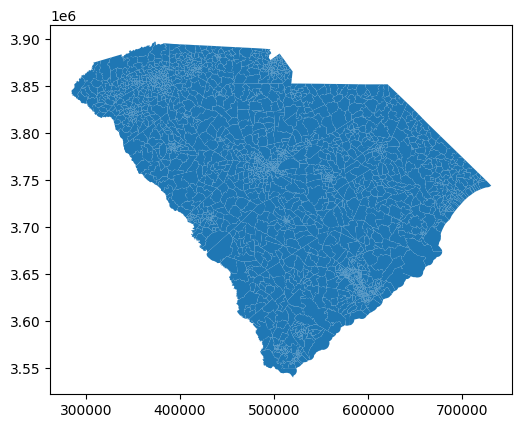

In [108]:
final_df.plot()

In [109]:
pop_vals = [final_df.loc[final_df["SEND"] == str(n).zfill(2), "TOTPOP"].sum() for n in range(1, 68)]
print(pop_vals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 115379, 114799, 116372, 113906, 110343, 115314, 114934, 116334, 115330, 107145, 107058, 107439, 111966, 116377, 111316, 111525, 108146, 116431, 105981, 112072, 107453, 106681, 104025, 115722, 116557, 113877, 105892, 106835, 106441, 105983, 106773, 106768, 105894, 117569, 106227, 108753, 111953, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [110]:
import matplotlib.pyplot as plt
from gerrychain import Graph, GeographicPartition, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom, propose_random_flip
from gerrychain.accept import always_accept
from functools import partial
import time

import pandas as pd
import numpy as np
from collections import Counter

In [112]:
directory = "./SC"
if not os.path.exists(directory):
    os.makedirs(directory)
final_df.to_file("./SC/SC.shp")

In [113]:
sc_df = gpd.read_file("./SC/SC.shp")
sc_df = mn_df.fillna(0)
mn_graph = Graph.from_geodataframe(mn_df, adjacency="rook")

In [63]:
elections = [
    Election("G20PRED", {"Democratic": "G20PRED", "Republican": "G20PRER"}),
]

In [64]:
# return districts won by dems
def get_democratic_wins(partition):
    dem_wins = 0
    
    for district in partition.parts:
        dem_votes = sum(partition.graph.nodes[node]["G20PRED"] for node in partition.parts[district])
        rep_votes = sum(partition.graph.nodes[node]["G20PRER"] for node in partition.parts[district])
        
        if dem_votes > rep_votes:
            dem_wins += 1
            
    return dem_wins

In [65]:
my_updaters = {
    "cut_edges": cut_edges,
    "population": updaters.Tally("TOTPOP", alias="population"),
    "G20PRED": updaters.Tally("G20PRED"),
    "G20PRER": updaters.Tally("G20PRER"),
    "democratic_wins": get_democratic_wins
}

In [66]:
election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

In [67]:
initial_partition = Partition(mn_graph, assignment="SEND", updaters=my_updaters)

In [68]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

In [69]:
save_district_graph_mod=1
save_district_plot_mod=100

proposal = partial(recom,
                   pop_col="TOTPOP",
                   pop_target=ideal_population,
                   epsilon=0.10,
                   node_repeats=2
                  )
compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]),
    2*len(initial_partition["cut_edges"])
)

pop_constraint = constraints.within_percent_of_ideal_population(initial_partition, 0.18)

In [70]:
# run chain for steps and return data
def run_chain(steps):
    print("chain number of steps: ", steps)
    
    chain = MarkovChain(
        proposal=proposal,
        constraints=[pop_constraint, compactness_bound],
        accept=accept.always_accept,
        initial_state=initial_partition,
        total_steps=steps
    )
    
    cut_edges_count = []
    dem_wins_count = []
    dem_vote_percents = []
    
    for i, partition in enumerate(chain.with_progress_bar()):
        cut_edges_count.append(len(partition["cut_edges"]))
        dem_wins_count.append(partition["democratic_wins"])
        dem_vote_percents.append(sorted(partition["G20PRED"].percents("Democratic")))
    
    return cut_edges_count, dem_wins_count, dem_vote_percents

/opt/homebrew/anaconda3/envs/gerry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


chain number of steps:  100


100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 116.94it/s]


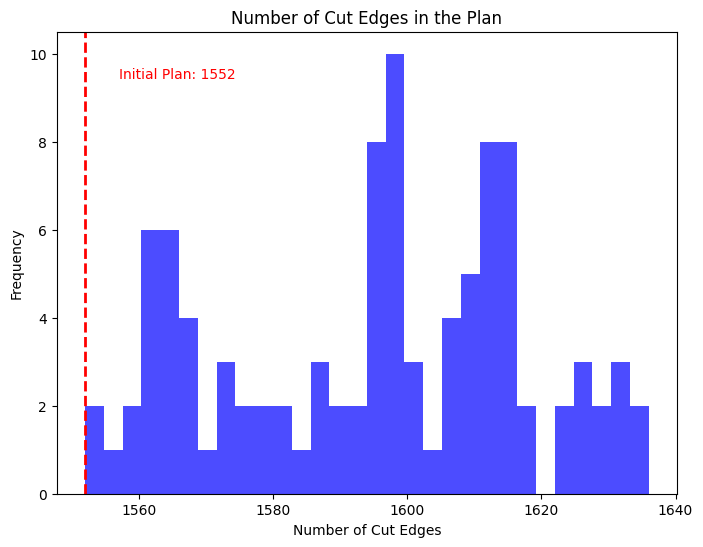

In [71]:
steps = 100
cut_edges_data, dem_wins_data, dem_vote_percent_data = run_chain(steps)

# Plot histogram for cut edges
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the histogram
ax.hist(cut_edges_data, bins=30, color='blue', alpha=0.7)

# Draw a vertical line for the initial plan's cut edges
initial_cut_edges = len(initial_partition["cut_edges"])
ax.axvline(initial_cut_edges, color="red", linestyle="--", linewidth=2)

# Add text annotation for the initial plan's cut edges
ax.text(initial_cut_edges + 5, ax.get_ylim()[1] * 0.9, 
        f"Initial Plan: {initial_cut_edges}", 
        color='red', fontsize=10)

# Annotate
ax.set_title("Number of Cut Edges in the Plan")
ax.set_xlabel("Number of Cut Edges")
ax.set_ylabel("Frequency")

# Save and show
plt.savefig('cut_edges_histogram.png')
plt.show()